## Part 1: Analyzing Raw Vac_tweets
er 1.1: Updated to include sentiment analysis 

In [1]:
# import appropriate libraries
import numpy as np
import pandas as pd
import csv
import re
import seaborn as sns

# import tweets
vac_tweets = pd.read_csv("vaccination_all_tweets.csv")
print("Read in", vac_tweets.shape[0], "tweets.")
vac_tweets.head()

Read in 51392 tweets.


id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [2]:
# Import list of medical professional titles (including alternative titles and some alternative spellings) and acronyms
lst = []
with open("professions.txt", "r") as fd:
    reader = csv.reader(fd)
    for row in reader:
        lst.append(row[0].lower().strip())
# remove duplicates in the raw titles text file
professions = set(lst)
print("Read in", len(professions), "professions.")

lst = []
with open("acronyms.txt", "r") as fd:
    reader = csv.reader(fd)
    for row in reader:
        lst.append(row[0].strip())
# remove duplicates in the raw titles text file
acronyms = set(lst)

lst = []
with open("acronyms_period.txt", "r") as fd:
    reader = csv.reader(fd)
    for row in reader:
        lst.append(row[0].strip())
# remove duplicates in the raw titles text file
acronyms_period = set(lst)
print("Read in",len(acronyms) + len(acronyms_period), "acronyms.")

Read in 241 professions.
Read in 56 acronyms.


The methods in this notebook are used to determine whether a user is a medical professional or not. The definition for medical professional is as follows: "any person licensed or certified to provide health care services to natural persons, including but not limited to, a physician, dentist, nurse, chiropractor, optometrist, physical or occupational therapist, social worker, clinical dietitian, clinical psychologist, licensed professional counselor, licensed marriage and family therapist, pharmacist, or speech therapist."

Sites used to collect titles for healthcare professionals:
https://en.wikipedia.org/wiki/List_of_healthcare_occupations
https://college.mayo.edu/academics/explore-health-care-careers/careers-a-z/
https://www.thebalancecareers.com/healthcare-medical-job-titles-2061494

In [3]:
# method that returns a boolean value on whether the text contains the profession or acronym.
# expects a str; if the method receives anything other (like a NaN float), will return false by default.
def medical_text(txt):
    if type(txt) != str:
        return False
    # search for the acronym with breaks (does not count middle of sentences)
    for acr in acronyms:
        pattern = "\\b" + acr + "\\b"
        if re.search(pattern, txt):
            return True
    # use exact substring searching for acronyms separated by periods
    for acr in acronyms_period:
        if acr in txt:
            return True
     # use exact substring searching for profession names
    for prof in professions:
        if prof in txt.lower():
            return True
    return False

In [4]:
med_profs_tweets = vac_tweets[vac_tweets["user_description"].apply(lambda x: medical_text(x))]
print("Read in", med_profs_tweets.shape[0], "tweets believed to be posted by medical professionals.")
print("Proportion of ", (med_profs_tweets.shape[0]/ vac_tweets.shape[0])*100, "%", " medical professional tweets.", sep="") 

Read in 2176 tweets believed to be posted by medical professionals.
Proportion of 4.2341220423412205% medical professional tweets.


In [5]:
# Use this cell to print out and view the user descriptions
#med_profs_tweets["user_description"].apply(lambda x: print(x + "\n"))

## Part 2: Sentiment Analysis

In [6]:
tweets_val = pd.read_csv("data_tweets_with_valence.csv")
print("Read in", tweets_val.shape[0], "tweets.")
tweets_val.head()

Read in 51392 tweets.


Unnamed: 0                   id             user_name  \
0           0  1340539111971516416            Rachel Roh   
1           1  1338158543359250433           Albert Fong   
2           2  1337858199140118533              eli🇱🇹🇪🇺👌   
3           3  1337855739918835717         Charles Adler   
4           4  1337854064604966912  Citizen News Channel   

               user_location  \
0  La Crescenta-Montrose, CA   
1          San Francisco, CA   
2                   Your Bed   
3     Vancouver, BC - Canada   
4                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet predicted_sentiments nltk_sentiments  
0         0          0       False             Negative        Positive  
1         1          1       False             Negative        Negative  
2         0          0       False             Negative        Positive  
3       446       2129       False             Positive         Neutral  
4         0          0       False             Negative         Neutral

In [7]:
tweets_val["sentiment"] = 0
tweets_val.loc[tweets_val["nltk_sentiments"] == "Positive", "sentiment"] = 1 
tweets_val.loc[tweets_val["nltk_sentiments"] == "Negative", "sentiment"] = -1 

In [8]:
## here, med_profs_tweets now works with the tweets dataset that contains sentiment information
med_profs_tweets = tweets_val[tweets_val["user_description"].apply(lambda x: medical_text(x))]
print("Read in", med_profs_tweets.shape[0], "tweets believed to be posted by medical professionals.")
print("Proportion of ", (med_profs_tweets.shape[0]/ vac_tweets.shape[0])*100, "%", " medical professional tweets.", sep="") 

Read in 2176 tweets believed to be posted by medical professionals.
Proportion of 4.2341220423412205% medical professional tweets.


In [9]:
tweets_val.drop(med_profs_tweets.index, axis=0, inplace=True)
tweets_no_med = tweets_val
print("There are", tweets_no_med.shape[0], "tweets believed to not be posted by medical professionals.")

There are 49216 tweets believed to not be posted by medical professionals.


In [10]:
med_pos =(med_profs_tweets[med_profs_tweets["nltk_sentiments"] == "Positive"].shape[0] / med_profs_tweets.shape[0]) * 100
med_neu =(med_profs_tweets[med_profs_tweets["nltk_sentiments"] == "Neutral"].shape[0] / med_profs_tweets.shape[0]) * 100
med_neg =(med_profs_tweets[med_profs_tweets["nltk_sentiments"] == "Negative"].shape[0] / med_profs_tweets.shape[0]) * 100

not_med_pos = (tweets_no_med[tweets_no_med["nltk_sentiments"] == "Positive"].shape[0] / tweets_no_med.shape[0]) * 100
not_med_neu = (tweets_no_med[tweets_no_med["nltk_sentiments"] == "Neutral"].shape[0] / tweets_no_med.shape[0]) * 100
not_med_neg = (tweets_no_med[tweets_no_med["nltk_sentiments"] == "Negative"].shape[0] / tweets_no_med.shape[0]) * 100

d = {"percent_pos": [],
     "percent_neu": [],
     "percent_neg":[]}
sentiment_df = pd.DataFrame(data=[[med_pos, med_neu, med_neg, "Med Prof"],
                                  [not_med_pos, not_med_neu, not_med_neg, "Not Med Prof"]],
                           columns = ["percent_pos","percent_neu","percent_neg", "profession"])
sentiment_df

percent_pos  percent_neu  percent_neg    profession
0    48.529412    38.648897    12.821691      Med Prof
1    36.337776    44.891905    18.770319  Not Med Prof

In [11]:
sen_df = pd.DataFrame(data = [[med_pos, "positive", "medical professional"],
                             [med_neu, "neutral", "medical professional"],
                             [med_neg, "negative", "medical professional"],
                             [not_med_pos, "positive", "not medical professional"],
                             [not_med_neu, "neutral", "not medical professional"],
                             [not_med_neg, "negative", "not medical professional"],],
                     columns = ["percent", "sentiment", "profession"])
sen_df

percent sentiment                profession
0  48.529412  positive      medical professional
1  38.648897   neutral      medical professional
2  12.821691  negative      medical professional
3  36.337776  positive  not medical professional
4  44.891905   neutral  not medical professional
5  18.770319  negative  not medical professional

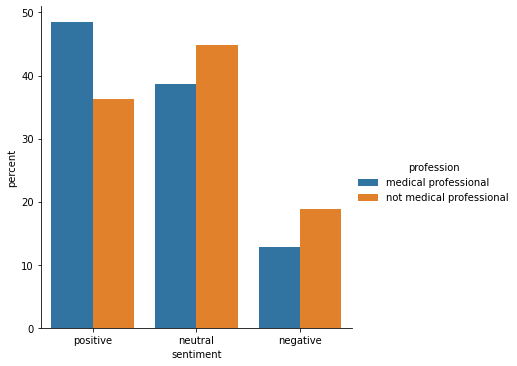

In [12]:
sns.catplot(data = sen_df, y = "percent", x = "sentiment", hue = "profession", kind = "bar")

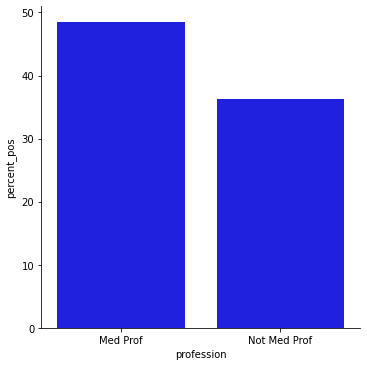

In [13]:
#positive percentage
sns.catplot(data= sentiment_df, y = "percent_pos", x = "profession", kind='bar', color= "blue") 

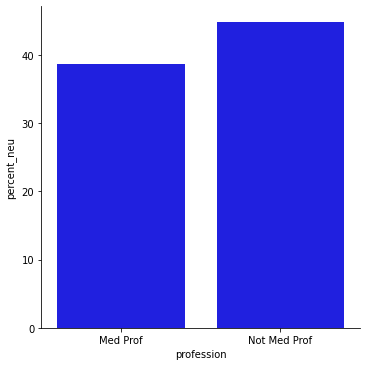

In [14]:
#neutral percentage
sns.catplot(data= sentiment_df, y = "percent_neu", x = "profession", kind='bar', color= "blue") 

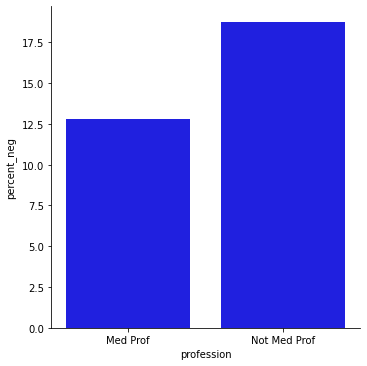

In [15]:
#negative percentage
sns.catplot(data= sentiment_df, y = "percent_neg", x = "profession", kind='bar', color= "blue") 

In [16]:
#statiscally significance section:
from scipy import stats
import math

mean1 = med_profs_tweets["sentiment"].mean()
mean2 = tweets_no_med["sentiment"].mean()
std1 = med_profs_tweets["sentiment"].std()
std2 = tweets_no_med["sentiment"].std()

print("Medical Professions mean sentiment:", mean1)
print("Non medical Professions mean sentiment:", mean2)

stats.ttest_ind_from_stats(mean1 = mean1, std1 = std1, nobs1 = med_profs_tweets.shape[0],
                          mean2 = mean2, std2 = std2, nobs2 = tweets_no_med.shape[0])

Medical Professions mean sentiment: 0.3570772058823529
Non medical Professions mean sentiment: 0.17567457737321196


Ttest_indResult(statistic=11.496938518050172, pvalue=1.4897142054048668e-30)

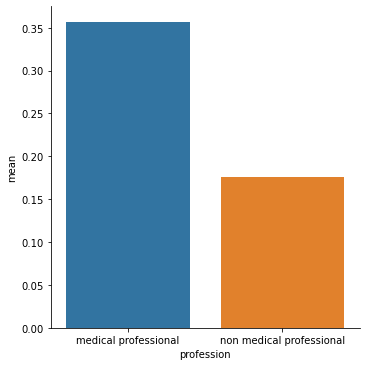

In [17]:
mean_df = pd.DataFrame( data = [[mean1, "medical professional"], [mean2, "non medical professional"]], 
                       columns = ["mean","profession"])

sns.catplot(data = mean_df, y ="mean", x ="profession", kind = "bar")